In [1]:
# %load lstm_comparison.py
import src.core as mlApi
import src.core_configs as configs

def initTrainPredict(modelList, retrain=False, plot=True):
    mlApi.initModels(modelList)
    mlApi.trainModels(retrain)
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=plot,
    )

Using TensorFlow backend.


In [2]:
# 1. Define dataset specifics

filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('G', 'C', '10min')

# 2. Initiate and divide data

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 13885 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 146747 rows



In [3]:
# 3. Define models

lstm_1x_128 = mlApi.LSTM('lstm 1x 128', layers=[128], enrolWindow=16)

lstmd_1x_16 = mlApi.LSTM('lstmd 1x 16', layers=[16], dropout=0.3, enrolWindow=16)
lstmd_1x_32 = mlApi.LSTM('lstmd 1x 32', layers=[32], dropout=0.3, enrolWindow=16)
lstmd_1x_64 = mlApi.LSTM('lstmd 1x 64', layers=[64], dropout=0.3, enrolWindow=16)
lstmd_1x_128 = mlApi.LSTM('lstmd 1x 128', layers=[128], dropout=0.3, enrolWindow=16)

lstmd_2x_16 = mlApi.LSTM('lstmd 2x 16', layers=[16, 16], dropout=0.3, enrolWindow=16)
lstmd_2x_32 = mlApi.LSTM('lstmd 2x 32', layers=[32, 32], dropout=0.3, enrolWindow=16)
lstmd_2x_64 = mlApi.LSTM('lstmd 2x 64', layers=[64, 64], dropout=0.3, enrolWindow=16)
lstmd_2x_128 = mlApi.LSTM('lstmd 2x 128', layers=[128, 128], dropout=0.3, enrolWindow=16)

linear_cv = mlApi.Linear_Regularized('linear r')

mlp_d = mlApi.MLP('mlp for ensemble 2x 64', layers=[64, 64], dropout=0.2)

ensemble = mlApi.Ensemble('lstmd + linear', [lstmd_2x_64, linear_cv])
ensemble2 = mlApi.Ensemble('lstmd2 + linear', [lstmd_1x_128, linear_cv])
ensemble3 = mlApi.Ensemble('lstm + mlp', [lstmd_2x_64, mlp_d])

Training model linear r
Model lstmd 1x 16 was loaded from file
Model lstmd 1x 32 was loaded from file
Model lstmd 2x 16 was loaded from file
Model lstmd 2x 32 was loaded from file
+-------------+-----------+-------------+---------------+--------+
|    Model    | Min. loss | Chosen loss | Min. val loss | Epochs |
+-------------+-----------+-------------+---------------+--------+
| lstmd 1x 16 |  0.04189  |   0.048115  |    0.290245   |  284   |
| lstmd 1x 32 |  0.030425 |   0.045124  |    0.288125   |  164   |
| lstmd 2x 16 |  0.039979 |   0.054809  |    0.316328   |  195   |
| lstmd 2x 32 |  0.014902 |   0.036102  |    0.27723    |  162   |
+-------------+-----------+-------------+---------------+--------+


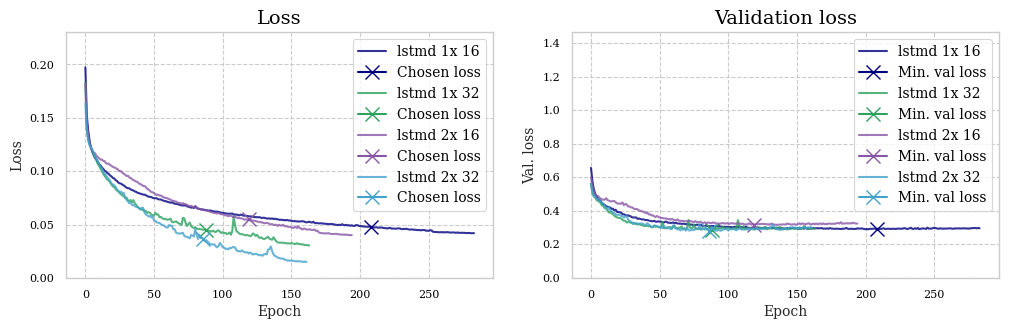

Model prediction scores
+-------------+-------------+------------+
|    Model    | Train score | Test score |
+-------------+-------------+------------+
|   linear r  |    0.4405   |  -0.9779   |
| lstmd 1x 16 |    0.7157   |  -0.7779   |
| lstmd 1x 32 |    0.6103   |  -1.1579   |
| lstmd 2x 16 |    0.6962   |  -1.0544   |
| lstmd 2x 32 |    0.5682   |  -0.7423   |
+-------------+-------------+------------+


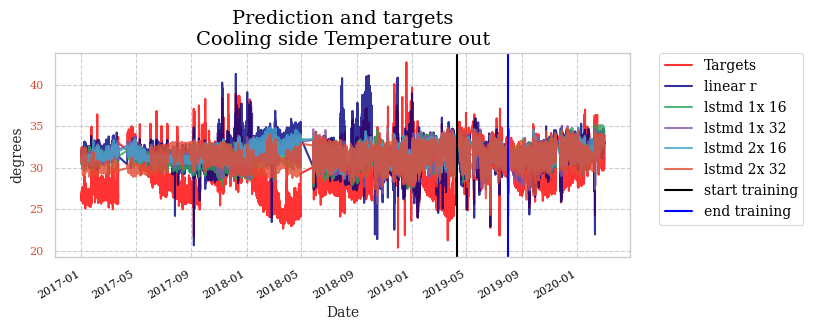

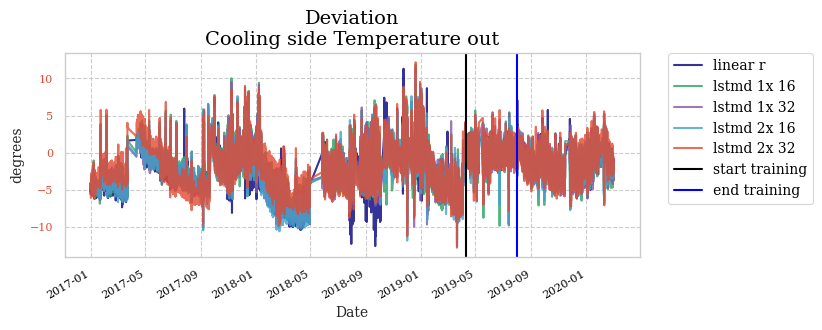

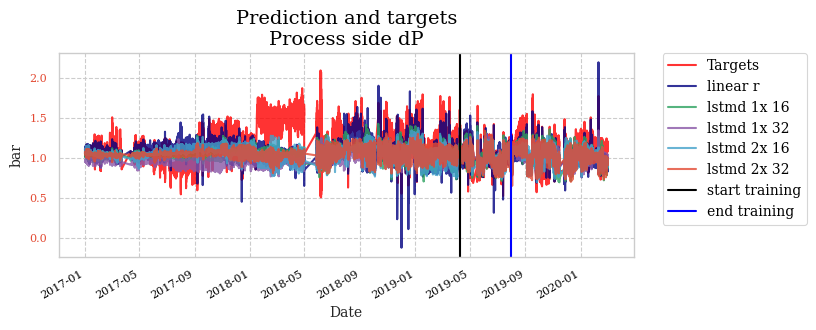

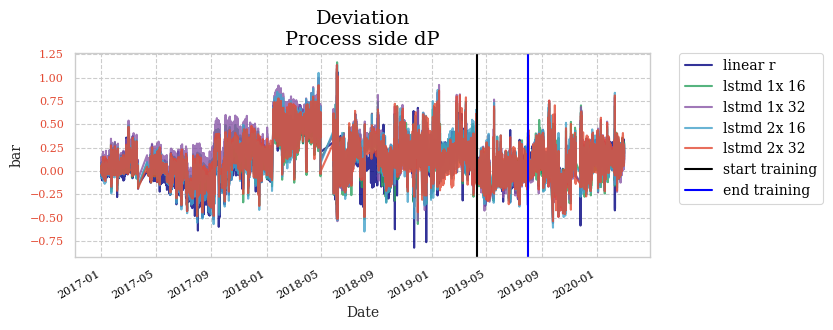

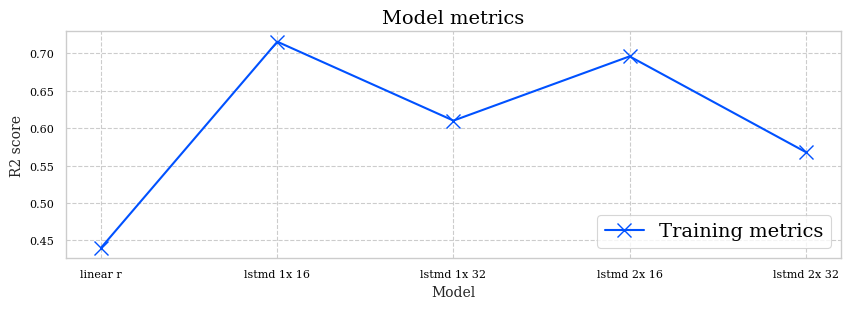

In [4]:
modelList = [
    linear_cv,
    lstmd_1x_16,
    lstmd_1x_32,
    lstmd_2x_16,
    lstmd_2x_32,
]

initTrainPredict(modelList)

Training model linear r
Model lstmd 1x 64 was loaded from file
Model lstmd 1x 128 was loaded from file
Model lstmd 2x 64 was loaded from file
Model lstmd 2x 128 was loaded from file
+--------------+-----------+-------------+---------------+--------+
|    Model     | Min. loss | Chosen loss | Min. val loss | Epochs |
+--------------+-----------+-------------+---------------+--------+
| lstmd 1x 64  |  0.009388 |   0.02772   |    0.261556   |  141   |
| lstmd 1x 128 |  0.001682 |   0.025673  |    0.251836   |   80   |
| lstmd 2x 64  |  0.002677 |   0.024856  |    0.25868    |   80   |
| lstmd 2x 128 |  0.000363 |   0.028581  |    0.249653   |  105   |
+--------------+-----------+-------------+---------------+--------+


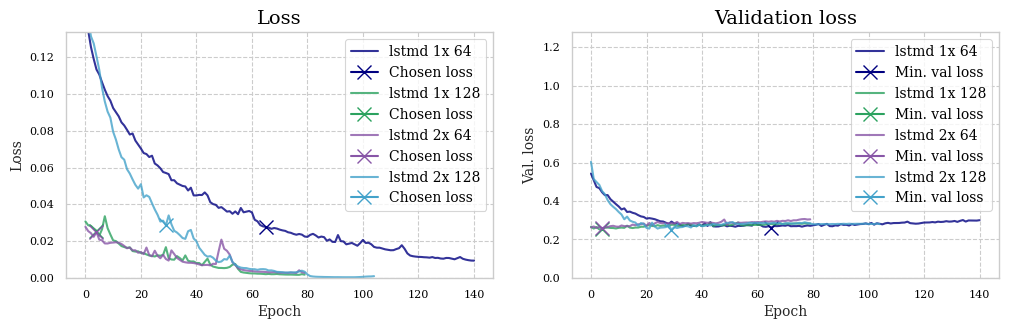

Model prediction scores
+--------------+-------------+------------+
|    Model     | Train score | Test score |
+--------------+-------------+------------+
|   linear r   |    0.4405   |  -0.9779   |
| lstmd 1x 64  |    0.603    |  -1.6819   |
| lstmd 1x 128 |    0.617    |  -0.9476   |
| lstmd 2x 64  |    0.6133   |  -0.7869   |
| lstmd 2x 128 |    0.6897   |  -0.9184   |
+--------------+-------------+------------+


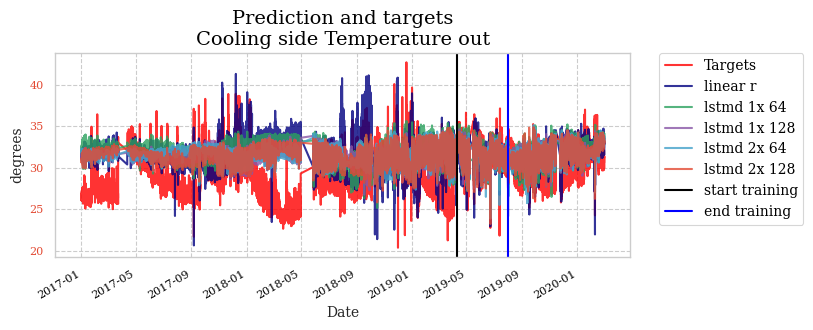

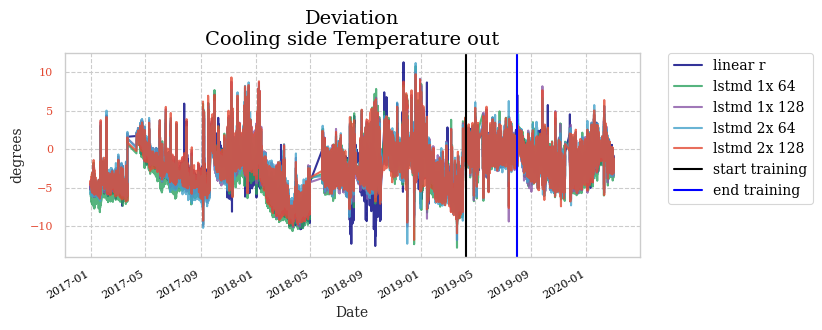

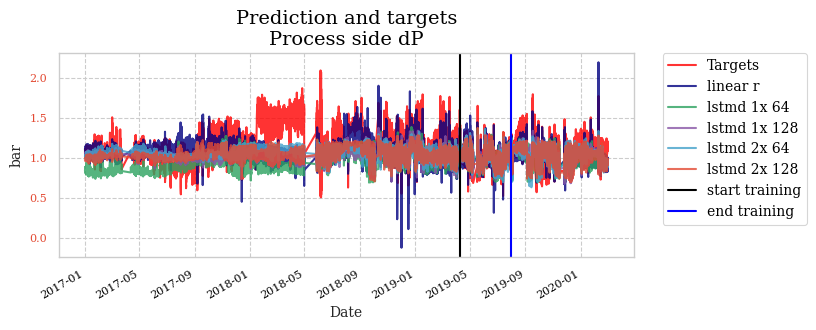

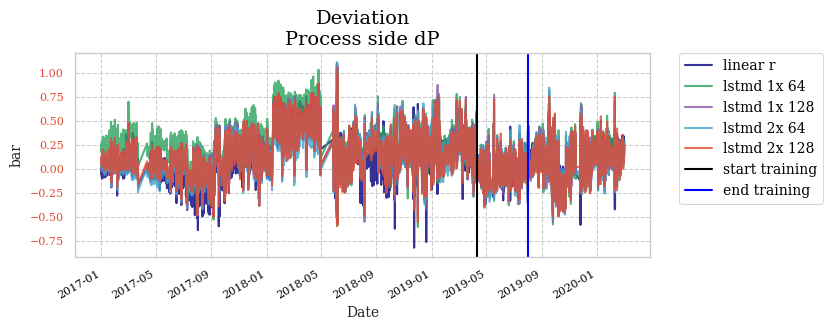

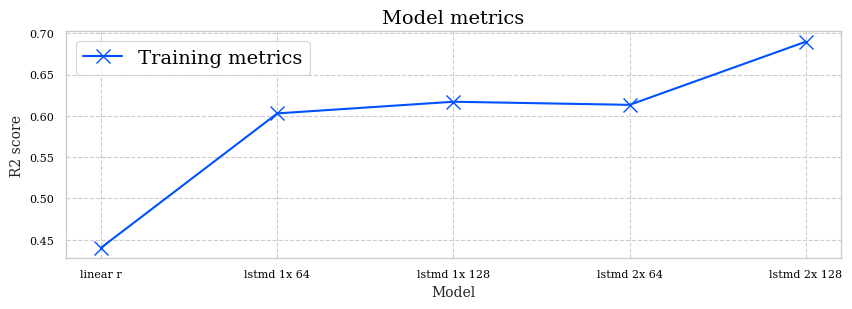

In [5]:
modelList = [
    linear_cv,
    lstmd_1x_64,
    lstmd_1x_128,
    lstmd_2x_64,
    lstmd_2x_128,
]

initTrainPredict(modelList)

Training model linear r
Model lstmd + linear was loaded from file
Training submodel linear r of Ensemble lstmd + linear
Model lstmd2 + linear was loaded from file
Training submodel linear r of Ensemble lstmd2 + linear
Model lstm + mlp was loaded from file
Model lstm + mlp was loaded from file
+------------------------------------+-----------+-------------+---------------+--------+
|               Model                | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------------------------+-----------+-------------+---------------+--------+
|    lstmd + linear, lstmd 2x 64     |  0.002677 |   0.024856  |    0.25868    |   80   |
|   lstmd2 + linear, lstmd 1x 128    |  0.001682 |   0.025673  |    0.251836   |   80   |
|      lstm + mlp, lstmd 2x 64       |  0.002677 |   0.024856  |    0.25868    |   80   |
| lstm + mlp, mlp for ensemble 2x 64 |  0.263342 |   0.275842  |    1.711555   |  563   |
+------------------------------------+-----------+-------------+------------

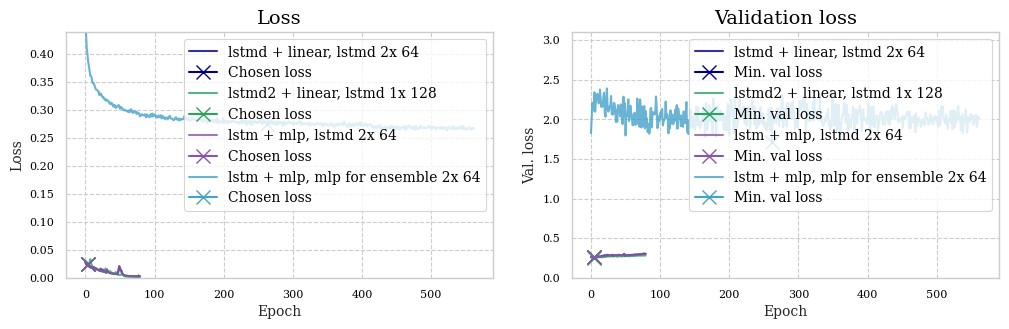

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
|     linear r    |    0.4405   |  -0.9779   |
|  lstmd + linear |    0.7038   |   -0.786   |
| lstmd2 + linear |    0.7075   |  -0.8777   |
|    lstm + mlp   |    0.7367   |  -1.2619   |
+-----------------+-------------+------------+


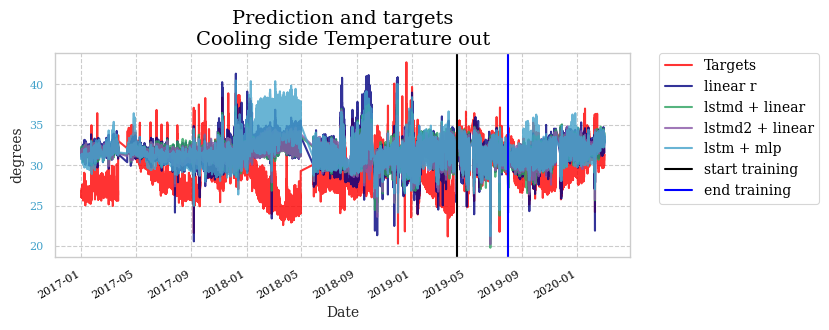

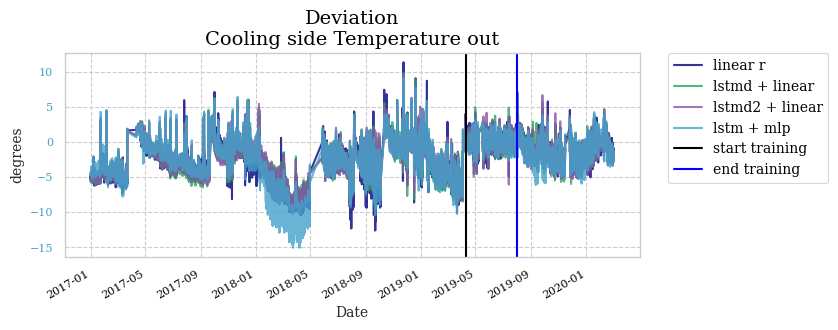

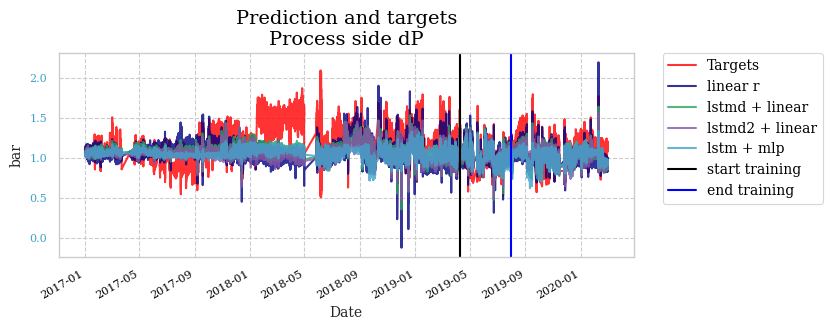

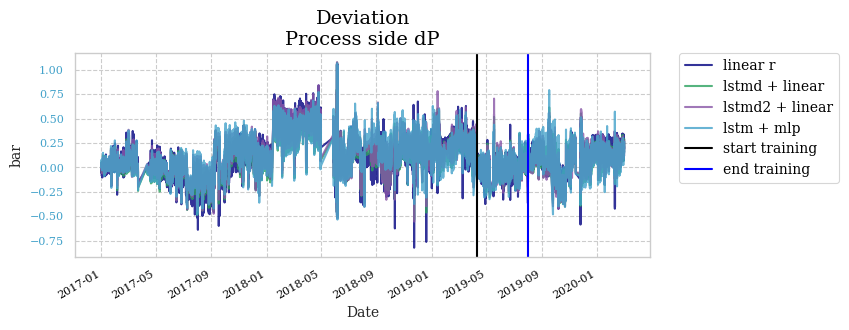

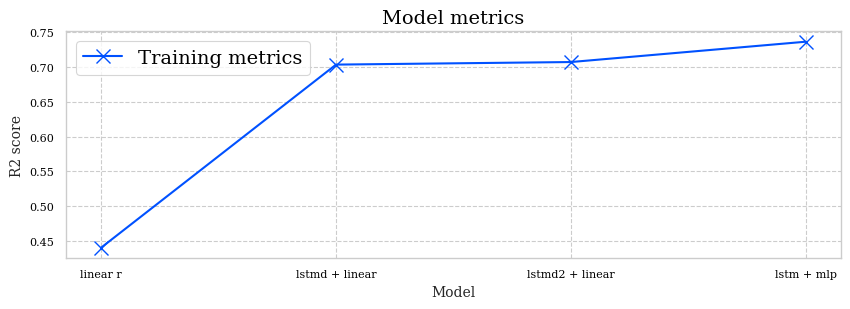

In [6]:
modelList = [
    linear_cv,
    ensemble,
    ensemble2,
	ensemble3,
]

initTrainPredict(modelList)